Load the dataset and display:

In [ ]:
import pandas as pd

In [ ]:
# Simulated dataset of complaints
data = {
    "complaint_text": [
        "I have been charged twice for the same transaction!",
        "My credit card application was denied without explanation.",
        "They keep calling me even after I asked them to stop.",
        "The loan officer was rude and unhelpful.",
        "I was promised a refund but never received it.",
        "My account was frozen without prior notice.",
        "Unauthorized transactions appeared on my debit card.",
        "Customer service did not resolve my issue.",
        "The website is always down when I try to log in.",
        "They reported incorrect information to the credit bureau.",
        "I can’t access my account online.",
        "Received a late fee even though I paid on time.",
        "My mortgage payment was misapplied to another account.",
        "Their representative hung up on me.",
        "Hidden charges keep showing up on my bill.",
        "I was threatened with legal action for a debt I don’t owe.",
        "No one responds to my emails or calls.",
        "They keep sending me unwanted promotional offers.",
        "My balance is incorrect despite multiple complaints.",
        "The ATM swallowed my card and I never got it back.",
        "Bank refused to reverse a fraudulent charge.",
        "The mobile app crashes constantly.",
        "Interest rates were changed without informing me.",
        "I never authorized this loan.",
        "The overdraft fees are unfair and excessive."
    ]
}

In [ ]:
df = pd.DataFrame(data)
print(df.head(25))

                                       complaint_text
0   I have been charged twice for the same transac...
1   My credit card application was denied without ...
2   They keep calling me even after I asked them t...
3            The loan officer was rude and unhelpful.
4      I was promised a refund but never received it.
5         My account was frozen without prior notice.
6   Unauthorized transactions appeared on my debit...
7          Customer service did not resolve my issue.
8    The website is always down when I try to log in.
9   They reported incorrect information to the cre...
10                  I can’t access my account online.
11    Received a late fee even though I paid on time.
12  My mortgage payment was misapplied to another ...
13                Their representative hung up on me.
14         Hidden charges keep showing up on my bill.
15  I was threatened with legal action for a debt ...
16             No one responds to my emails or calls.
17  They keep sending me unw

In [ ]:
df["char_count"] = df["complaint_text"].apply(len)
df["word_count"] = df["complaint_text"].apply(lambda x: len(x.split()))

print(df[["complaint_text", "char_count", "word_count"]].head(25))
import nltk

                                       complaint_text  char_count  word_count
0   I have been charged twice for the same transac...          51           9
1   My credit card application was denied without ...          58           8
2   They keep calling me even after I asked them t...          53          11
3            The loan officer was rude and unhelpful.          40           7
4      I was promised a refund but never received it.          46           9
5         My account was frozen without prior notice.          43           7
6   Unauthorized transactions appeared on my debit...          52           7
7          Customer service did not resolve my issue.          42           7
8    The website is always down when I try to log in.          48          11
9   They reported incorrect information to the cre...          57           8
10                  I can’t access my account online.          33           6
11    Received a late fee even though I paid on time.          4

Q2. Apply the following pipeline using SpaCY:



In [ ]:
# Download tokenizer + tagger models for new NLTK
import spacy
import matplotlib.pyplot as plt

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

from nltk import word_tokenize, pos_tag
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
all_tags = []

for text in df["complaint_text"]:
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)   # (word, POS_tag)
    tags = [t[1] for t in tagged]  # only POS tags
    all_tags.extend(tags)
    tag_freq = Counter(all_tags)
print("Top POS tags (NLTK):", tag_freq.most_common(10))


Top POS tags (NLTK): [('NN', 41), ('.', 25), ('PRP', 20), ('JJ', 18), ('VBD', 17), ('IN', 14), ('DT', 14), ('PRP$', 11), ('RB', 10), ('NNS', 9)]


In [ ]:
nlp = spacy.load("en_core_web_sm")
verbs = []
adjs = []
for doc in nlp.pipe(df["complaint_text"], disable=["ner"]):
    for token in doc:
        if token.pos_ == "VERB":
            verbs.append(token.lemma_)
        elif token.pos_ == "ADJ":
            adjs.append(token.lemma_)
verb_freq = Counter(verbs).most_common(10)
adj_freq = Counter(adjs).most_common(10)

print("Top Verbs:", verb_freq)
print("Top Adjectives:", adj_freq)

Top Verbs: [('keep', 3), ('receive', 2), ('charge', 1), ('deny', 1), ('call', 1), ('ask', 1), ('stop', 1), ('promise', 1), ('freeze', 1), ('appear', 1)]
Top Adjectives: [('incorrect', 2), ('same', 1), ('rude', 1), ('unhelpful', 1), ('prior', 1), ('unauthorized', 1), ('late', 1), ('hidden', 1), ('legal', 1), ('unwanted', 1)]


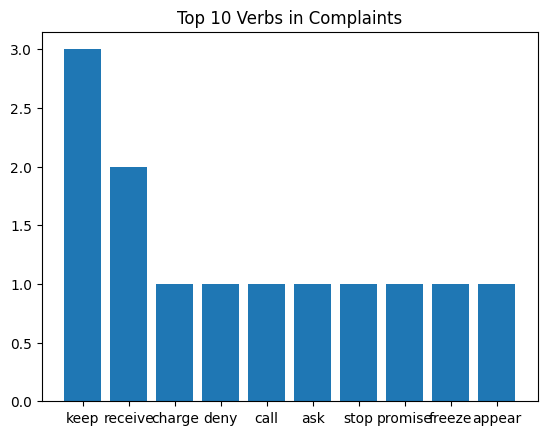

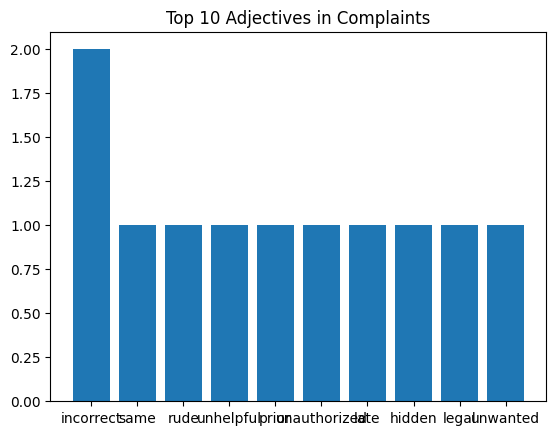

In [ ]:

# Visualization
plt.bar([x[0] for x in verb_freq], [x[1] for x in verb_freq])
plt.title("Top 10 Verbs in Complaints")
plt.show()

plt.bar([x[0] for x in adj_freq], [x[1] for x in adj_freq])
plt.title("Top 10 Adjectives in Complaints")
plt.show()
import re

texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https://example.com for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]


In [ ]:

cleaned_texts = []

for t in texts:
    # Remove phone numbers
    t = re.sub(r'\+?\d[\d\-\s]{8,}\d', ' ', t)
    # Remove emails
    t = re.sub(r'\S+@\S+', ' ', t)
    # Remove URLs
    t = re.sub(r'http\S+|www\S+', ' ', t)
    # Remove special characters (keep words and spaces)
    t = re.sub(r'[^a-zA-Z\s]', ' ', t)
    # Normalize spaces
    t = re.sub(r'\s+', ' ', t).strip()
    cleaned_texts.append(t)

print("\nCleaned Texts:")
for ct in cleaned_texts:
    print(ct)


Cleaned Texts:
My phone number is and my email is
Visit for more info
HELLO This is SOOOOO exciting
Contact us at or call
Python s regex is very useful Coding Fun
